In [1]:
import pandas as pd

In [2]:
df=pd.read_excel(r'D:/工作文档/项目文档/店铺分级/河北神农居/shennongju_first_class.xlsx')

In [3]:
print(df)

     org_no         org_name                            address  \
0       101         中心路神农居药店                       河北省沧州市黄骅市中心路   
1      1012          青县神农居药店              河北省青县104国道与会川路交叉口北50米   
2      1014        青县神农居道东药店               青县新华东路北侧合兴小区7号楼27号门市   
3       102         新华路神农居药店               黄骅市新华路东段第二幼儿园西200米路北   
4       103       神农居信誉楼大街药店                           黄骅市信誉楼大街   
5       104         华兴街神农居药店                    黄骅市华兴街新世纪家具广场对过   
6       105         方庄子神农居药店                     黄骅市新华路安定医院西50米   
7       106         开发区神农居药店                        黄骅市开发区二号路北侧   
8       107         新海路神农居药店                   黄骅市新海路南侧盛华超市西20米   
9       108        渤海西路神农居药店               黄骅市渤海路南神华大街东侧捷馨家园门市楼   
10      109         文化路神农居药店                        黄骅市文化路二中门口西   
11      110        石港东路神农居药店                         黄骅市石港路南楼西段   
12      114          海兴神农居药店                                NaN   
13      115      海兴县海政路神农居药店                  海兴县城海政路北兴融街西交警队对

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.ensemble import IsolationForest

In [7]:
print(df.shape)

(144, 23)


In [8]:
x=df.iloc[:,3:23]

In [9]:
org_no=df.iloc[:,0]

In [10]:
print(x)

     modern_medicine_payment_ratio  modern_medicine_profit_ratio  \
0                         0.576745                      0.341906   
1                         0.676224                      0.448671   
2                         0.724763                      0.530634   
3                         0.506351                      0.301073   
4                         0.627714                      0.409846   
5                         0.695039                      0.521651   
6                         0.716695                      0.528699   
7                         0.754718                      0.607077   
8                         0.715106                      0.504270   
9                         0.724924                      0.608073   
10                        0.721167                      0.607053   
11                        0.777917                      0.639184   
12                        0.679315                      0.528887   
13                        0.658157              

In [11]:
print(org_no)

0       101
1      1012
2      1014
3       102
4       103
5       104
6       105
7       106
8       107
9       108
10      109
11      110
12      114
13      115
14      116
15      117
16      118
17      119
18      120
19      121
20      122
21      124
22      125
23      126
24      128
25      129
26      130
27      131
28      132
29      133
       ... 
114     247
115     249
116     250
117     252
118     253
119     254
120     255
121     256
122     257
123     258
124     259
125     260
126     261
127     262
128     263
129     264
130     265
131     266
132     267
133     268
134     269
135     270
136     271
137     272
138     273
139     274
140     275
141     276
142     277
143     278
Name: org_no, Length: 144, dtype: int64


In [14]:
for column in list(x.columns[x.isnull().sum() > 0]):
    mean_val = x[column].median()
    x[column].fillna(mean_val, inplace=True)

In [15]:
clf = IsolationForest(max_samples=100*2, random_state= np.random.RandomState(42))

In [16]:
clf.fit(x.values)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:187: UserWarning: max_samples (200) is greater than the total number of samples (144). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))


IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples=200, n_estimators=100, n_jobs=1,
        random_state=<mtrand.RandomState object at 0x0000016A2902E0D8>,
        verbose=0)

In [17]:
y_pred_train = clf.predict(x.values)

In [18]:
print(y_pred_train)

[-1  1  1 -1 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1]


In [38]:
a=(list(np.where(y_pred_train==-1)))

In [41]:
print(a)

[array([  0,   3,   4,  13,  19,  30,  57,  60,  61,  67, 104, 108, 112,
       139, 140], dtype=int64)]


In [39]:
print(x.values)

[[0.57674523 0.34190564 0.03444756 ... 0.05883627 0.04367371 0.21176471]
 [0.67622424 0.44867145 0.09714481 ... 0.03280636 0.01239325 0.21113791]
 [0.72476326 0.53063351 0.14855777 ... 0.06160012 0.01868107 0.20484522]
 ...
 [0.72468271 0.57153774 0.64913485 ... 0.04078895 0.19121465 0.2261236 ]
 [0.70427515 0.65222753 0.64955887 ... 0.04811797 0.16387166 0.24799465]
 [0.67181908 0.60295258 0.60775643 ... 0.0351896  0.16206041 0.20295203]]


In [48]:
for i in np.where(y_pred_train==-1):
        print(org_no[i])

0      101
3      102
4      103
13     115
19     121
30     134
57     163
60     166
61     167
67     191
104    237
108    241
112    245
139    274
140    275
Name: org_no, dtype: int64


In [49]:
print(clf.decision_function(x.values))

[-0.04822858  0.03395947  0.0910285  -0.07511083  0.01192306  0.06469107
  0.07660262  0.10976092  0.07539043  0.11855972  0.12176149  0.10406488
  0.03723103  0.00460795  0.0874846   0.04736915  0.03674824  0.02274969
  0.12607196 -0.01049275  0.03489291  0.10609884  0.09477077  0.06752045
  0.02767794  0.09780249  0.09136124  0.13891965  0.04995318  0.09494697
 -0.10307308  0.11570879  0.08427231  0.12324558  0.14429095  0.11834626
  0.09483425  0.10166669  0.11606558  0.08775313  0.10903663  0.1404915
  0.08236718  0.10801323  0.08093092  0.11452709  0.05394028  0.09497052
  0.01774201  0.04673133  0.12686197  0.03802618  0.09626712  0.10919915
  0.10285832  0.10578414  0.07259446  0.00272141  0.02593981  0.08249964
 -0.03340848 -0.02355621  0.06265994  0.01686892  0.08061053  0.12216883
  0.07670809 -0.01453038  0.09569895  0.10803561  0.06168733  0.07021964
  0.07724549  0.08340616  0.07359034  0.09110084  0.07348165  0.09166444
  0.04910297  0.07158405  0.06819506  0.1024516   0.

In [50]:
# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

In [51]:
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [52]:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

In [53]:
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction,
                                         random_state=42))]

In [62]:
xx, yy = np.meshgrid(np.linspace(-1, 1, 12),
                     np.linspace(-1, 1, 12))


In [63]:
plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5))

<Figure size 648x900 with 0 Axes>

<Figure size 648x900 with 0 Axes>

In [64]:
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

<Figure size 432x288 with 0 Axes>

In [65]:
plot_num = 1
rng = np.random.RandomState(42)

In [66]:
import time

C:\Users\User\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:622: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "
C:\Users\User\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-258.904478817769416 > -259.967656677853768)
  % (det, previous_det), RuntimeWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-258.987736062582542 > -260.327320649919898)
  % (det, previous_det), RuntimeWarning)


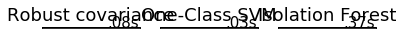

In [67]:
 for name, algorithm in anomaly_algorithms:
       t0 = time.time()
       algorithm.fit(x.values)
       t1 = time.time()
       plt.subplot(len(x.values), len(anomaly_algorithms), plot_num)
       plt.title(name, size=18)
       # fit the data and tag outliers
       if name == "Local Outlier Factor":
           y_pred = algorithm.fit_predict(x.values)
       else:
           y_pred = algorithm.fit(x.values).predict(x.values)

       # plot the levels lines and the points
       Z = algorithm.decision_function(x.values)
       Z = Z.reshape(xx.shape)
       plt.contour(xx, yy, Z,linewidths=2, colors='black')
       colors = np.array(['#377eb8', '#ff7f00'])
       plt.scatter(x.values[:,5],x.values[:,9],s=10, color=colors[(y_pred + 1) // 2])

       plt.xlim(-1, 1)
       plt.ylim(-1, 1)
       plt.xticks(())
       plt.yticks(())
       plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                transform=plt.gca().transAxes, size=15,
                horizontalalignment='right')
       plot_num += 1

In [68]:
plt.show()

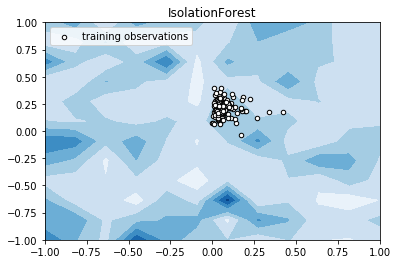

In [69]:
xx, yy = np.meshgrid(np.linspace(-1, 1, 12), np.linspace(-1, 1, 12))
Z = clf.decision_function(x.values)
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(x.values[:, 5],x.values[:, 9], c='white',
                 s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.legend([b1],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

In [70]:
clf2= LocalOutlierFactor(
        n_neighbors=35, contamination=outliers_fraction)

In [71]:
clf2.fit(x.values)

LocalOutlierFactor(algorithm='auto', contamination=0.15, leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=35,
          p=2)

In [72]:
y_pred_train2=clf2.fit_predict(x.values)

In [73]:
print(y_pred_train2)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1 -1 -1  1  1  1  1 -1  1  1  1
  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1 -1  1  1
  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1 -1 -1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1 -1  1  1  1 -1 -1  1  1  1]


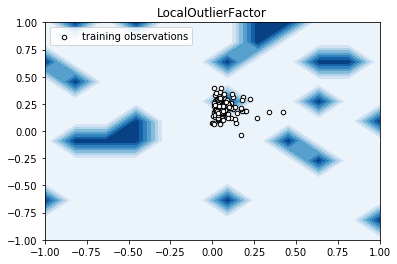

In [74]:
xx, yy = np.meshgrid(np.linspace(-1, 1, 12), np.linspace(-1, 1, 12))
Z = clf2.fit_predict(x.values)
Z = Z.reshape(xx.shape)

plt.title("LocalOutlierFactor")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(x.values[:, 5],x.values[:, 9], c='white',
                 s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.legend([b1],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

In [75]:
clf3=EllipticEnvelope(contamination=outliers_fraction)

In [76]:
clf3.fit(x.values)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:622: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "
C:\Users\User\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-259.654882148897912 > -259.822021926638627)
  % (det, previous_det), RuntimeWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\covariance\robust_covariance.py:165: RuntimeWarning: Warning! det > previous_det (-257.926139740386986 > -259.985210910883438)
  % (det, previous_det), RuntimeWarning)


EllipticEnvelope(assume_centered=False, contamination=0.15, random_state=None,
         store_precision=True, support_fraction=None)

In [77]:
y_pred_train=clf3.predict(x.values)

In [78]:
print(y_pred_train)

[-1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1
 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1 -1  1 -1  1  1  1
  1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1  1]


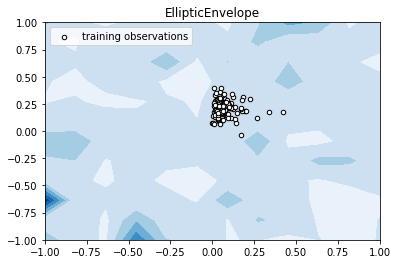

In [79]:
xx, yy = np.meshgrid(np.linspace(-1, 1, 12), np.linspace(-1, 1, 12))
Z = clf3.decision_function(x.values)
Z = Z.reshape(xx.shape)

plt.title("EllipticEnvelope")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(x.values[:, 5],x.values[:, 9], c='white',
                 s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.legend([b1],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()

In [80]:
clf4=svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)

In [81]:
clf4.fit(x.values)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.15, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [82]:
y_pred_train=clf4.predict(x.values)

In [83]:
print(y_pred_train)

[-1  1  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1
 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1 -1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1 -1  1  1  1  1]


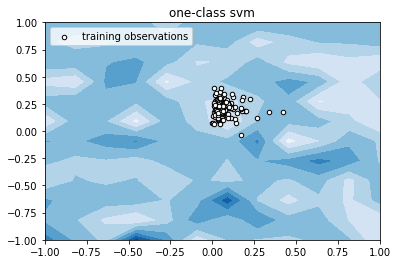

In [84]:
xx, yy = np.meshgrid(np.linspace(-1, 1, 12), np.linspace(-1, 1, 12))
Z = clf4.decision_function(x.values)
Z = Z.reshape(xx.shape)

plt.title("one-class svm")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(x.values[:, 5],x.values[:, 9], c='white',
                 s=20, edgecolor='k')

plt.axis('tight')
plt.xlim((-1, 1))
plt.ylim((-1, 1))
plt.legend([b1],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()